In [148]:
# impor atau mengambil library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium

In [149]:
# masukkan dataframe yang akan digunakan
sambas = pd.read_excel("535230133_Sambas_1990_1999.xlsx", sheet_name="Data BMKG")

In [150]:
sambas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3652 non-null   datetime64[ns]
 1   Tn       3652 non-null   int64         
 2   Tx       3652 non-null   float64       
 3   Tavg     3651 non-null   float64       
 4   RH_avg   3651 non-null   float64       
 5   RR       3652 non-null   float64       
 6   ss       3229 non-null   float64       
 7   ff_x     3651 non-null   float64       
 8   ddd_x    3645 non-null   float64       
 9   ff_avg   3651 non-null   float64       
 10  ddd_car  3651 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 314.0+ KB


In [151]:
#menampilkan ukuran data

print('Jumlah sampel = ', sambas.shape[0]) #jumlah baris

print('Jumlah variabel (kolom) = ', sambas.shape[1]) #jumlah kolom

Jumlah sampel =  3652
Jumlah variabel (kolom) =  11


In [152]:
nama_kolom = sambas.columns #mencetak nama kolom
nama_kolom

Index(['Date', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x',
       'ff_avg', 'ddd_car'],
      dtype='object')

In [153]:
#cetak 5 baris pertama
sambas.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,1990-01-01,21,29.5,25.7,90.0,17.0,1.3,3.0,200.0,2.0,S
1,1990-01-02,23,28.7,26.0,89.0,0.0,1.9,2.0,360.0,2.0,N
2,1990-01-03,22,32.7,25.6,84.0,0.0,5.4,4.0,360.0,2.0,N
3,1990-01-04,23,29.0,26.4,87.0,54.1,1.1,4.0,360.0,2.0,N
4,1990-01-05,20,27.4,24.6,92.0,1.0,NaN,2.0,340.0,1.0,N


In [154]:
#cetak 5 baris terakhir
sambas.tail()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
3647,1999-12-27,22,28.8,25.0,89.0,8.9,0.8,3.0,360.0,2.0,N
3648,1999-12-28,22,30.0,26.4,89.0,0.6,2.8,4.0,360.0,2.0,N
3649,1999-12-29,24,28.2,25.3,92.0,11.5,NaN,2.0,360.0,0.0,N
3650,1999-12-30,23,28.8,25.5,91.0,47.0,1.3,4.0,360.0,2.0,N
3651,1999-12-31,22,28.8,25.6,91.0,1.5,0.6,3.0,360.0,1.0,N


In [155]:
#memeriksa jumlah nilai yang hilang dalam dataframe
sambas.isna().sum()

Date         0
Tn           0
Tx           0
Tavg         1
RH_avg       1
RR           0
ss         423
ff_x         1
ddd_x        7
ff_avg       1
ddd_car      1
dtype: int64

In [156]:
#menghitung persentase nilai yang hilang dalam setiap kolom dataframe
sambas.isna().sum()/len(sambas)*100

Date        0.000000
Tn          0.000000
Tx          0.000000
Tavg        0.027382
RH_avg      0.027382
RR          0.000000
ss         11.582694
ff_x        0.027382
ddd_x       0.191676
ff_avg      0.027382
ddd_car     0.027382
dtype: float64

In [157]:
#Mengisi missing values menggunakan metode forward fill ffill() dan backward fill bfill()
sambas2 = sambas.ffill()
sambas2 = sambas2.bfill()

In [158]:
#Memeriksa apakah masih ada missing values
sambas2.isna().sum()/len(sambas2)*100

Date       0.0
Tn         0.0
Tx         0.0
Tavg       0.0
RH_avg     0.0
RR         0.0
ss         0.0
ff_x       0.0
ddd_x      0.0
ff_avg     0.0
ddd_car    0.0
dtype: float64

In [159]:
# Mengganti nilai 8888 dan 9999 dengan NaN
sambas2.replace([8888, 9999], pd.NA, inplace=True)

# Mengisi nilai yang hilang dengan metode ffill() dan bfill()
sambas2.ffill(inplace=True)
sambas2.bfill(inplace=True)

C:\Users\Hernando\AppData\Local\Temp\ipykernel_18168\4257851683.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sambas2.ffill(inplace=True)


In [160]:
# menampilkan deskripsi statistika (nilai rata-rata, standar deviasi, nilai minimum, nilai maksimum, dan kuartil)
D = sambas2.describe()
D

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,3652,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,1994-12-31 12:00:00,22.549014,31.449069,26.660679,86.518894,7.503724,3.960268,2.979189,268.581873,1.377327
min,1990-01-01 00:00:00,17.000000,22.200000,23.100000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992-07-01 18:00:00,22.000000,30.400000,25.900000,83.000000,0.000000,1.800000,2.000000,190.000000,1.000000
50%,1994-12-31 12:00:00,23.000000,31.800000,26.700000,86.000000,0.200000,3.800000,3.000000,270.000000,1.000000
75%,1997-07-01 06:00:00,23.000000,32.800000,27.500000,90.000000,7.000000,6.100000,4.000000,360.000000,2.000000
max,1999-12-31 00:00:00,30.000000,36.300000,30.000000,98.000000,271.200000,8.400000,24.000000,360.000000,6.000000
std,NaN,0.988599,1.960407,1.108409,4.543460,17.354851,2.455612,1.188646,88.939290,0.800924


In [161]:
#Menambahkan kolom Tahun, Bulan dan Hari pda data frame yang diekstraksi dari kolom Tanggal
sambas2['Tahun'] = pd.DatetimeIndex(sambas2['Date']).year
sambas2['Bulan'] = pd.DatetimeIndex(sambas2['Date']).month
sambas2['Hari'] = sambas2['Date'].dt.day_name()

ANALISA TEMPERATUR MINIMUM(Tn)

Text(0.5, 1.0, 'Grafik 1 rata-rata Temperatur Minimum Tn Tahun 1990-1999')

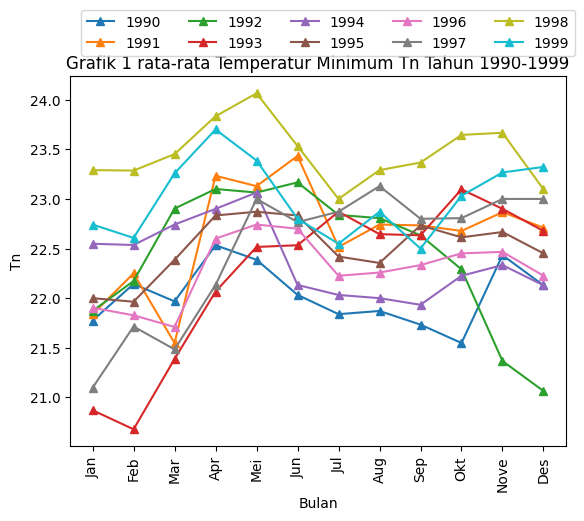

In [162]:
var = 'Tn'
r = sambas2.groupby(['Bulan', 'Tahun'])[var].mean()
r.unstack().plot(marker ='^')
plt.ylabel(var)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','Mei'
                                        ,'Jun','Jul','Aug','Sep',
                                        'Okt','Nove','Des'],rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=5)
plt.title('Grafik 1 rata-rata Temperatur Minimum '+ var + ' Tahun 1990-1999')
# Membandingkan Nilai Rata-rata Temperatur Minimum Harian Pada Tahun 1990-1999


ANALISA TEMPERATUR MAKSIMUM(Tx)

Text(0.5, 1.0, 'Grafik 2 rata-rata Temperatur Maksimum Tx Tahun 1990-1999')

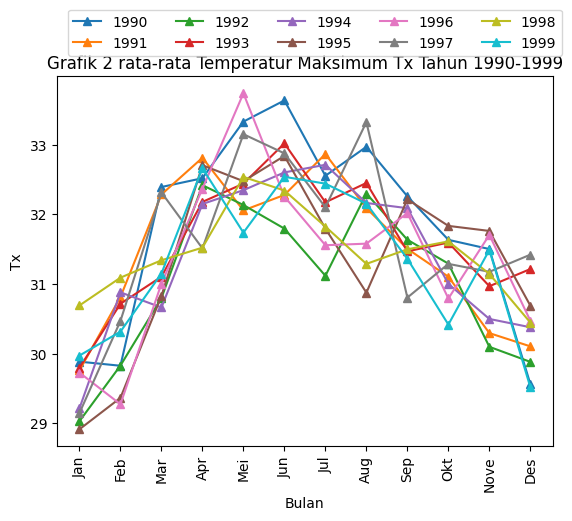

In [163]:
var = 'Tx'
r = sambas2.groupby(['Bulan', 'Tahun'])[var].mean()
r.unstack().plot(marker ='^')
plt.ylabel(var)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','Mei'
                                        ,'Jun','Jul','Aug','Sep',
                                        'Okt','Nove','Des'],rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=5)
plt.title('Grafik 2 rata-rata Temperatur Maksimum '+ var + ' Tahun 1990-1999')
# Perbandingan Nilai rata-rata Temperatur Maksimum Pada Tahun 1990-1999



ANALISA TEMPERATUR RATA-RATA (Tavg)


Text(0.5, 1.0, 'Grafik 3 rata-rata Temperatur rata-rata Tavg Tahun 1990-1999')

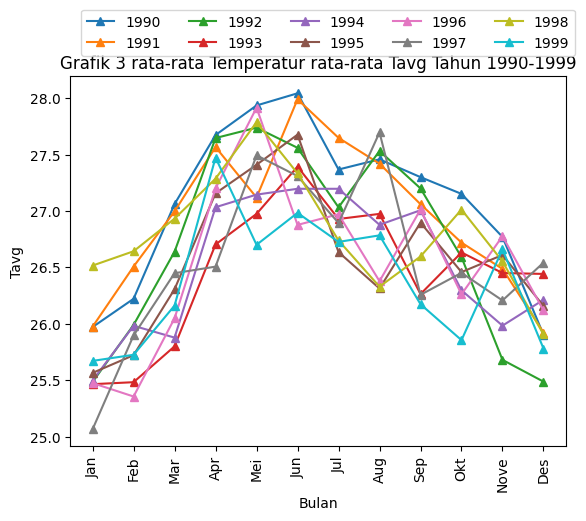

In [164]:
var = 'Tavg'
r = sambas2.groupby(['Bulan', 'Tahun'])[var].mean()
r.unstack().plot(marker ='^')
plt.ylabel(var)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','Mei'
                                        ,'Jun','Jul','Aug','Sep',
                                        'Okt','Nove','Des'],rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=5)
plt.title('Grafik 3 rata-rata Temperatur rata-rata '+ var + ' Tahun 1990-1999')
# Membandingkan Nilai Rata-rata Temperatur rata-rata Harian Pada Tahun 1990-1999

ANALISA KELEMBAPAN RATA-RATA (RH_avg)


Text(0.5, 1.0, 'Grafik 4 rata-rata Kelembapan rata-rata RH_avg Tahun 1990-1999')

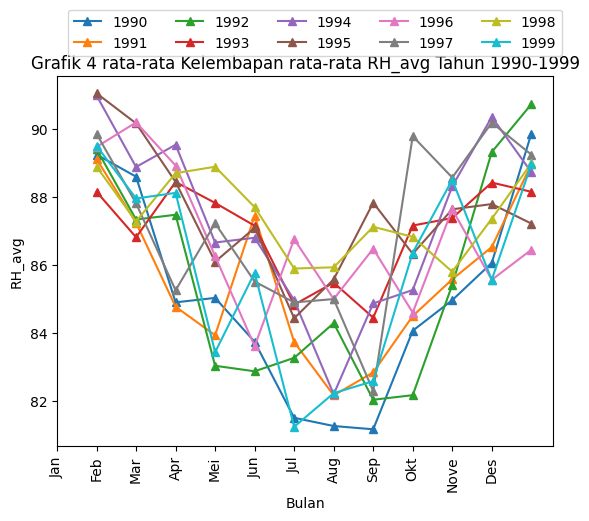

In [165]:
var = 'RH_avg'
r = sambas2.groupby(['Bulan', 'Tahun'])[var].mean()
r.unstack().plot(marker ='^')
plt.ylabel(var)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,],['Jan','Feb','Mar','Apr','Mei'
                                        ,'Jun','Jul','Aug','Sep',
                                        'Okt','Nove','Des'],rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=5)
plt.title('Grafik 4 rata-rata Kelembapan rata-rata '+ var + ' Tahun 1990-1999')
# Membandingkan Nilai Kelembapan Rata-rata Bulanan Pada Tahun 1990-1999

ANALISA CURAH HUJAN (RR)


Text(0.5, 1.0, 'Grafik 5 rata-rata Curah Hujan(mm)  RR Tahun 1990-1999')

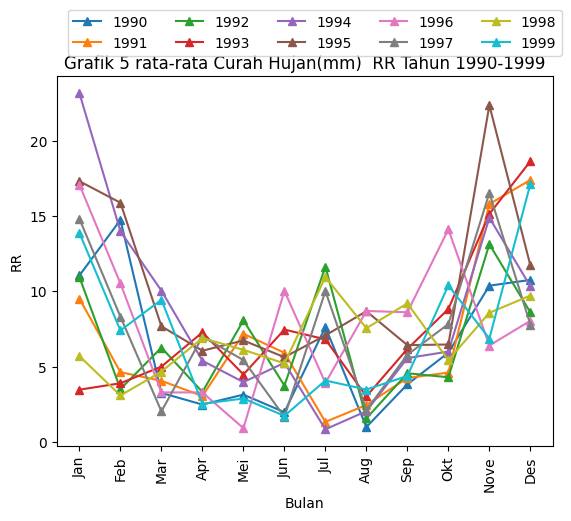

In [166]:
var = 'RR'
r = sambas2.groupby(['Bulan', 'Tahun'])[var].mean()
r.unstack().plot(marker ='^')
plt.ylabel(var)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','Mei'
                                        ,'Jun','Jul','Aug','Sep',
                                        'Okt','Nove','Des'],rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=5)
plt.title('Grafik 5 rata-rata Curah Hujan(mm)  '+ var + ' Tahun 1990-1999')
# Membandingkan Nilai Curah Hujan(mm) Bulanan Pada Tahun 1990-1999

ANALISA LAMANYA PENYINARAN MATAHARI (ss)


Text(0.5, 1.0, 'Grafik 6 rata-rata Lamanya Penyinaran Matahari(jam) ss Tahun 1990-1999')

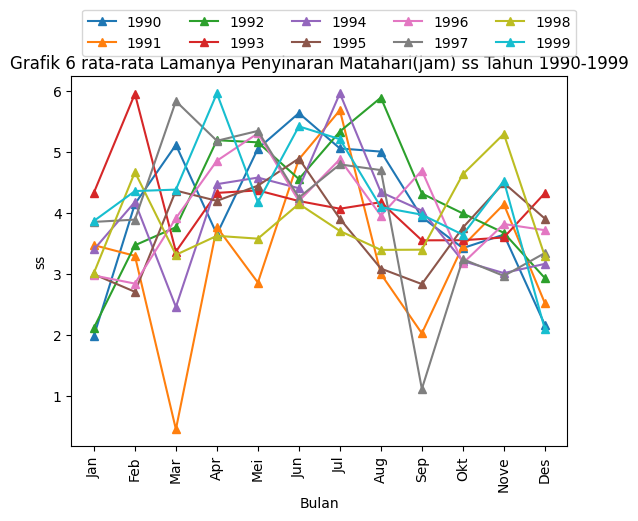

In [167]:
var = 'ss'
r = sambas2.groupby(['Bulan', 'Tahun'])[var].mean()
r.unstack().plot(marker ='^')
plt.ylabel(var)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','Mei'
                                        ,'Jun','Jul','Aug','Sep',
                                        'Okt','Nove','Des'],rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=5)
plt.title('Grafik 6 rata-rata Lamanya Penyinaran Matahari(jam) '+ var + ' Tahun 1990-1999')
# Membandingkan Nilai Rata-rata Lamanya Penyinaran Matahari(jam) Pada Tahun 1990-1999

ANALISIS Kecepatan Angin Maksimum(m/s)

Text(0.5, 1.0, 'Grafik 7 Rata-rata Kecepatan Angin Maksimum(m/s) ff_x Tahun 1990-1999')

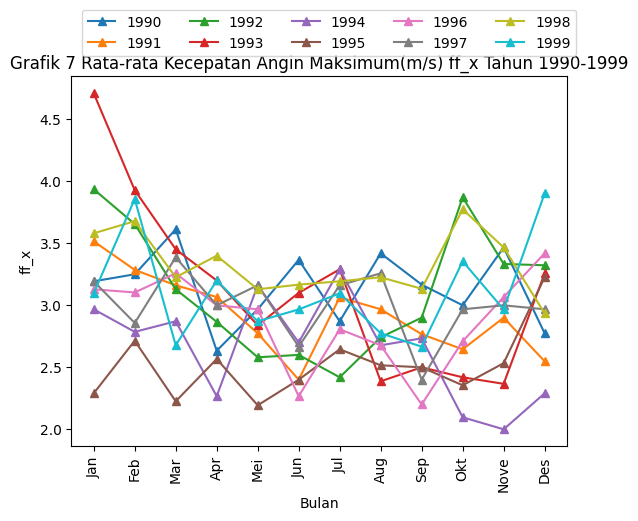

In [168]:
var = 'ff_x'
r = sambas2.groupby(['Bulan', 'Tahun'])[var].mean()
r.unstack().plot(marker ='^')
plt.ylabel(var)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','Mei'
                                        ,'Jun','Jul','Aug','Sep',
                                        'Okt','Nove','Des'],rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=5)
plt.title('Grafik 7 Rata-rata Kecepatan Angin Maksimum(m/s) '+ var + ' Tahun 1990-1999')
# Membandingkan Nilai Rata-rata Rata-rata Kecepatan Angin Maksimum(m/s) Pada Tahun 1990-1999

ANALISIS Kecepatan Angin Rata-rata(m/s)

Text(0.5, 1.0, 'Grafik 8 Rata-rata Kecepatan Angin rata-rata(m/s) ff_avg Tahun 1990-1999')

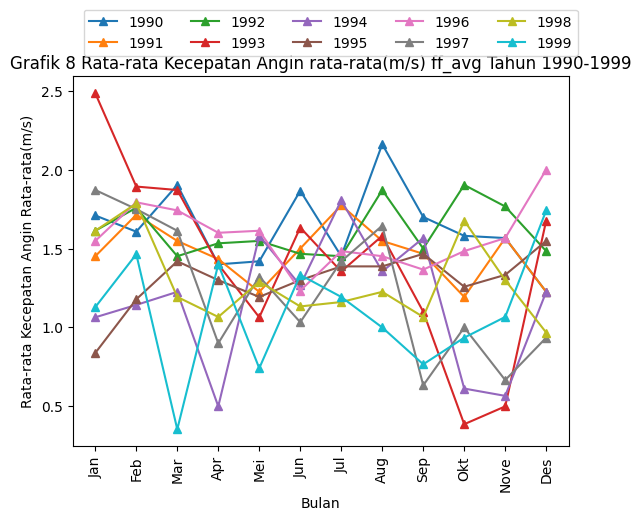

In [169]:
var = 'ff_avg'
r = sambas2.groupby(['Bulan', 'Tahun'])[var].mean()
r.unstack().plot(marker ='^')
plt.ylabel('Rata-rata Kecepatan Angin Rata-rata(m/s)')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','Mei'
                                        ,'Jun','Jul','Aug','Sep',
                                        'Okt','Nove','Des'],rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=5)
plt.title('Grafik 8 Rata-rata Kecepatan Angin rata-rata(m/s) '+ var + ' Tahun 1990-1999')
# Membandingkan Nilai Rata-rata Rata-rata Kecepatan Angin rata-rata(m/s) Pada Tahun 1990-1999